In [ ]:
#Data Science,# Big Query, #Data Visualization , #Statistics, #Mathematics

Find this Original Notebbok at =>( https://www.kaggle.com/sohelranaccselab/bigquery-for-deep-healthcare-analysis?scriptVersionId=43037708)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
!pip install chart-studio 

     |████████████████████████████████| 64 kB 156 kB/s eta 0:00:011
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [9]:
# Import the required libraries 

from bq_helper import BigQueryHelper
import bq_helper

from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import chart_studio.plotly as py
#from chart_studio.plotly import tools

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
init_notebook_mode(connected=True)

medicare = bq_helper.BigQueryHelper(active_project="bigquery-public-data", dataset_name="cms_medicare")
bq_assistant = BigQueryHelper("bigquery-public-data", "cms_medicare")

Using Kaggle's public dataset BigQuery integration.
Using Kaggle's public dataset BigQuery integration.


In [10]:
# How many nurrsing facilitins in different States 
query1 = """SELECT
state, COUNT(state) as total_facilities
FROM
  `bigquery-public-data.cms_medicare.home_health_agencies_2014`
  GROUP BY 
  state
ORDER BY
  total_facilities DESC;"""
response1 = medicare.query_to_pandas_safe(query1)
response1.head(10)

,state,total_facilities
0,TX,2340
1,FL,1158
2,CA,1135
3,IL,767
4,MI,610
5,OH,526
6,PA,303
7,OK,257
8,VA,211
9,IN,206


In [13]:
scl = [[0.0, 'rgb(248,255,206)'],[0.2, 'rgb(203,255,205)'],[0.4, 'rgb(155,255,164)'], [0.6, 'rgb(79,255,178)'],[0.8, 'rgb(15,183,132)'], [1, '#008059']]
query1 = """SELECT
state, COUNT(state) as total_facilities
FROM
  `bigquery-public-data.cms_medicare.home_health_agencies_2014`
  GROUP BY 
  state
ORDER BY
  total_facilities DESC;"""
response1 = medicare.query_to_pandas_safe(query1)
response1.head(10)
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = response1.state,
        z = response1.total_facilities,
        locationmode = 'USA-states',
        text = response1.state,
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "home_health_agencies in Different States")
        )
       ]

layout = dict(
        title = 'home_health_agencies in Different States',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map' )

In [15]:
query2 = """SELECT
  state, AVG(average_hcc_score) as avg_hcc_score, Max(average_hcc_score) as max_hcc_score, Min(average_hcc_score) as min_hcc_score, COUNT(average_hcc_score) as total_facilities
FROM
  `bigquery-public-data.cms_medicare.home_health_agencies_2014`
  GROUP BY 
  state
ORDER BY
  avg_hcc_score DESC;
        """
response2 = medicare.query_to_pandas_safe(query2)
response2.head(20)

,state,avg_hcc_score,max_hcc_score,min_hcc_score,total_facilities
0,DC,2.705556,3.98,2.01,18
1,NY,2.326087,4.01,1.43,138
2,NJ,2.306739,2.90,1.85,46
3,OH,2.302719,5.00,1.01,526
4,IN,2.293204,4.10,1.29,206
5,TX,2.282303,8.20,0.97,2340
6,HI,2.252143,2.68,1.86,14
7,MI,2.240164,4.61,0.91,610
8,CA,2.237322,6.48,1.02,1135
9,AZ,2.226165,4.97,1.35,133


In [16]:
trace1 = go.Bar(
    x=response2.state,
    y=response2.max_hcc_score,
    name='Max HCC Score',
    marker=dict(color='rgb(158,202,225)'),
)
trace2 = go.Bar(
    x=response2.state,
    y=response2.min_hcc_score,
    name='Min HCC Score',
    marker=dict(color='rgb(58,22,25)'),
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title='Minimum and Maximum HCC scores for different States',
    legend=dict(orientation="h")
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

Average HCC for different states

In [17]:

scl = [[0.0, 'rgb(255,233,225)'],[0.2, 'rgb(249,220,211)'],[0.4, 'rgb(227,192,183)'], [0.6, 'rgb(210,178,167)'],[0.8, 'rgb(182,151,146)'],[1.0, '#734842']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = response2.state,
        z = response2.avg_hcc_score,
        locationmode = 'USA-states',
        text = response2.state,
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Average HCC Scores")
        )
       ]

layout = dict(
        title = 'Average HCC Scores for different states',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map' )

home_health_agencies with very HIGH HCC score

In [19]:
query3 = """SELECT agency_name, city, state, average_hcc_score
FROM `bigquery-public-data.cms_medicare.home_health_agencies_2014`
ORDER BY average_hcc_score DESC;
        """
response3 = medicare.query_to_pandas_safe(query3)
response3.head(10)

,agency_name,city,state,average_hcc_score
0,"ELITE VINTAGE HEALTH CARE, LLC",SUGAR LAND,TX,8.20
1,TEAM NURSES HOME HEALTH SERVICES,SAN BERNARDINO,CA,6.48
2,CATALYST HEALTH SERVICES INC,HOUSTON,TX,6.38
3,PRIMARY MEDICAL STAFFING INC,MIRAMAR,FL,6.11
4,MARATHON HEALTHCARE SERVICES LLC,PEARLAND,TX,6.04


In [21]:
response3.tail(10)

,agency_name,city,state,average_hcc_score
10872,ST LOUIS HOME HEALTH,SAINT LOUIS,MO,1.00
10873,OSS HEALTH AT HOME,YORK,PA,1.00
10874,PRUDENT CHOICE HOMECARE SERVICE INC,GRAND PRAIRIE,TX,0.97
10875,"ASPIRE HOME HEALTHCARE, LLC",MORTON GROVE,IL,0.95
10876,SAHARA HOME HEALTH,LAS VEGAS,NV,0.94
10877,GREAT LAKES HOME HEALTH CARE AGENCY,IMLAY CITY,MI,0.91
10878,PINNACLE HOME HEALTH,HOLLADAY,UT,0.88
10879,VITALCARE HOME HEALTH,OMAHA,NE,0.88
10880,SOUTH BEST HOME CARE INC,FORT MYERS,FL,0.85
10881,CASS CO PUBLIC HEALTH SERVICES,WALKER,MN,0.85


In [23]:
tempdf = response3.head(10)
y = list(reversed(list(tempdf.agency_name)))
x = list(reversed(list(tempdf.average_hcc_score)))
trace1 = go.Bar(x=x, y=y, orientation="h", marker=dict(color='#f79284'),)
layout = dict(height=400, width=700, margin=dict(l=400), title='home_health_agencies having Maximum Average HCC Scores')
data = [trace1]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='stacked-bar')

In [25]:
query1 = """SELECT
  state, Sum(male_beneficiaries) as male_ben, Sum(female_beneficiaries) as female_ben
FROM
  `bigquery-public-data.cms_medicare.home_health_agencies_2014`
  GROUP BY 
      state
  ORDER BY
      male_ben DESC;
        """
response1 = medicare.query_to_pandas_safe(query1)


trace1 = go.Bar(
    x=response1.state,
    y=response1.male_ben,
    marker=dict(color='#e584f7'),
    name='Total Male '
)
trace2 = go.Bar(
    x=response1.state,
    y=response1.female_ben,
    marker=dict(color='#a0f784'),
    name='Total Female '
)

data = [trace1, trace2]
layout = go.Layout(barmode='group', legend=dict(orientation='h'), title='Male and Female Beneficiaries in 2014 in different states')
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

Difference in Male and Female Beneficiaries

In [26]:
response1['difference'] = response1['female_ben'] - response1['male_ben']

trace1 = go.Bar(
    x=response1.state,
    y=response1.difference,
    marker=dict(color='#aabfe0'),
    name='Total Male beneficiaries'
)
data = [trace1]
layout = go.Layout(barmode='group', legend=dict(orientation='h'), title='Difference in Male and Female Beneficiaries in Different State')
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

In [27]:
# for nursing_facilities_2014

Difference in Average Inpatient payment and Average Outpatient payments

In [28]:
query3_a = """SELECT provider_id, avg(average_total_payments) as average_outpatient_payments
FROM `bigquery-public-data.cms_medicare.outpatient_charges_2014` group by provider_id;"""
outp = medicare.query_to_pandas_safe(query3_a)

query3_b = """SELECT provider_id, avg(average_total_payments) as average_inpatient_payments
FROM `bigquery-public-data.cms_medicare.inpatient_charges_2014` group by provider_id;"""
inp = medicare.query_to_pandas_safe(query3_b)

merged = outp.merge(inp, on="provider_id", how = 'inner')
merged["difference"] = merged["average_inpatient_payments"] - merged['average_outpatient_payments']

tracex = go.Histogram(x = merged["difference"]) 
fig = go.Figure(data = [tracex])
fig['layout'].update(height=400, showlegend=False, title="Difference in average inpatient and outpatient payments");
iplot(fig, filename='simple-subplot');

Finding States / Facilities with poor average length of stay days

#States and their average total number stays (of different facilities) and average length of stays (in different facilities)

In [29]:
query2 = """SELECT
  state, AVG(average_length_of_stays_days) as average_length_of_stays_days, AVG(total_stays) as total_stays
FROM
  `bigquery-public-data.cms_medicare.nursing_facilities_2014`
  GROUP BY 
  state
ORDER BY
  average_length_of_stays_days DESC;
        """
response2 = medicare.query_to_pandas_safe(query2)
response2.head(10)


trace0 = go.Scatter(
    x=response2.average_length_of_stays_days,
    y=response2.state,
    mode='markers',
    name='Average Length of Stay in a State',
    marker=dict(
        color='rgba(156, 165, 196, 0.95)',
        line=dict(
            color='rgba(156, 165, 196, 1.0)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)
trace1 = go.Scatter(
    x=response2.total_stays,
    y=response2.state,
    mode='markers',
    name='Average of Total Stays in a State ',
    marker=dict(
        color='#00d8d8',
        line=dict(
            color='rgba(217, 217, 217, 1.0)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)

data = [trace0, trace1]
layout = go.Layout(
    title="Average Total Stays of each State and Average Length of Stays for each state ",
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        titlefont=dict(
            color='rgb(204, 204, 204)'
        ),
        tickfont=dict(
            color='rgb(102, 102, 102)',
        ),
#         autotick=False,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(
        l=140,
        r=40,
        b=50,
        t=80
    ),
    legend=dict(
        font=dict(
            size=10,
        ),
        yanchor='middle',
        xanchor='right',
    ),
#     width=800,
    height=600,
    paper_bgcolor='rgb(254, 247, 234)',
    plot_bgcolor='rgb(254, 247, 234)',
    hovermode='closest',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='lowest-oecd-votes-cast')

Inference

Average Length of Stay among the patients in all the states is very close to 30 days. (They also want to avoid 30-day readmission penalty)
Arizona has the significantly lower average lenght of stay equal to 22 which is quite less as compared to other states
Louisiana, Texas, Illinois, Mississippi are the states having greater than 30 day average length of stay, which indicates that patients are admitted there for longer number of days than average
Purto Rico, a territory of US has the lowest average length of stay among all the states and terriroties equal to 12.

New Jersy's nursing facilities has on-an-average very large number of total stays (equal to 321)

Iowa has the minium among the states equal to 73 total stays among its nursing facilities

 Facilities having highest average length of stay days

In [30]:
# which facilities have highest stays count 

query1 = """SELECT
  facility_name, city, state, average_length_of_stays_days
FROM
  `bigquery-public-data.cms_medicare.nursing_facilities_2014`
ORDER BY
  average_length_of_stays_days DESC;
        """
response1 = medicare.query_to_pandas_safe(query1)

tempdf = response1.head(10)
y = list(reversed(list(tempdf.facility_name)))
x = list(reversed(list(tempdf.average_length_of_stays_days)))
trace1 = go.Bar(x=x, y=y, orientation="h", marker=dict(color='#f7e484'))
layout = dict(height=400, width=700, title='Nursing Facilities having Maximum Average Length of Stay Days', margin=dict(l=400))
data = [trace1]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='stacked-bar')

#Lets Explore the Total Claims, Day Supply and Drug Costs
#Which State has highest claims, Day Supply, and Drug Costs

In [31]:
query1 = """SELECT
  nppes_provider_state AS state,
  ROUND(SUM(total_claim_count) / 1e6) AS total_claim_count_millions,
  ROUND(SUM(total_day_supply) / 1e6) AS total_day_supply_millions,
  ROUND(SUM(total_drug_cost) / 1e6) AS total_drug_cost_millions
FROM
  `bigquery-public-data.cms_medicare.part_d_prescriber_2014`
GROUP BY
  state
ORDER BY
  total_claim_count_millions DESC;
        """
response1 = medicare.query_to_pandas_safe(query1)
response1.head(10)

,state,total_claim_count_millions,total_day_supply_millions,total_drug_cost_millions
0,CA,116.0,4935.0,9633.0
1,FL,91.0,3769.0,6970.0
2,NY,80.0,3150.0,7522.0
3,TX,76.0,3105.0,6462.0
4,PA,63.0,2402.0,4842.0
5,OH,53.0,2181.0,4051.0
6,NC,46.0,1706.0,3358.0
7,IL,43.0,1724.0,3121.0
8,GA,39.0,1403.0,2787.0
9,MI,39.0,1797.0,3193.0


In [32]:
trace1 = go.Scatter(
    x=response1.total_day_supply_millions,
    y=response1.total_drug_cost_millions,
    mode='markers',
    text=response1.state,
    marker=dict(
        color=list(reversed([i*11 for i in range(200,251)])),
        size=response1.total_claim_count_millions,
        line=dict(
            width=2
        ),
    )
)
data = [trace1]

layout = go.Layout(
    title='Total claim count VS Total Drug Cost VS Total Day Supply for every state',
    xaxis=dict(
        title='Total Day Supply',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='Total Drug Cost',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter-colorscale')


Inference

California is the state having highest total day supply, highest total drug cost and highest claim count.
Other states having more claim counts include Florida, Texas, and New York

# Which Drugs have been most prescribed in US

In [33]:
# state wise count of claims 

## Which providers have highest claims 

query1 = """SELECT
  generic_name AS drug_name,
  ROUND(SUM(total_claim_count) / 1e6) AS total_claim_count_millions,
  ROUND(SUM(total_day_supply) / 1e6) AS total_day_supply_millions,
  ROUND(SUM(total_drug_cost) / 1e6) AS total_drug_cost_millions
FROM
  `bigquery-public-data.cms_medicare.part_d_prescriber_2014`
GROUP BY
  drug_name
ORDER BY
  total_claim_count_millions DESC;
        """
response1 = medicare.query_to_pandas_safe(query1)
tempdf = response1.head(50)

trace1 = go.Bar(
    x=tempdf.drug_name,
    y=tempdf.total_claim_count_millions,
    name='Total Claims'
)
trace2 = go.Bar(
    x=tempdf.drug_name,
    y=tempdf.total_day_supply_millions,
    name='Total Day Supply'
)
trace3 = go.Bar(
    x=tempdf.drug_name,
    y=tempdf.total_drug_cost_millions,
    name='Total Drug Cost'
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='group'
    , margin=dict(b=200)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

**Inference
**

Levothyroxine Sodium and LISINOPRIL are the drugs which are associated with the highest number of claims as well as highest number of supply
Insulin Glargine, Hum.Rec.An is the drug which is associated with the highest Total Drug Cost
Drugs having more Total Supply than Drug Costs are AMLODIPINE BESYLATE and SIMVASTATIN
Drugs having more Total Cost than Supply are Rosuvastatin Calcium, and Esomeprazole magnesium


#What about Nursing Specialities associated with highest claims


In [34]:
query1 = """SELECT
  specialty_description AS specialty_description,
  ROUND(SUM(total_claim_count) / 1e6) AS total_claim_count_millions,
  ROUND(SUM(total_day_supply) / 1e6) AS total_day_supply_millions,
  ROUND(SUM(total_drug_cost) / 1e6) AS total_drug_cost_millions
FROM
  `bigquery-public-data.cms_medicare.part_d_prescriber_2014`
GROUP BY
  specialty_description
ORDER BY
  total_claim_count_millions DESC;
        """
response1 = medicare.query_to_pandas_safe(query1)
tempdf = response1.head(40)
tempdf['specialty_description1'] = tempdf['specialty_description'].apply(lambda x: x.replace(" ","_"))

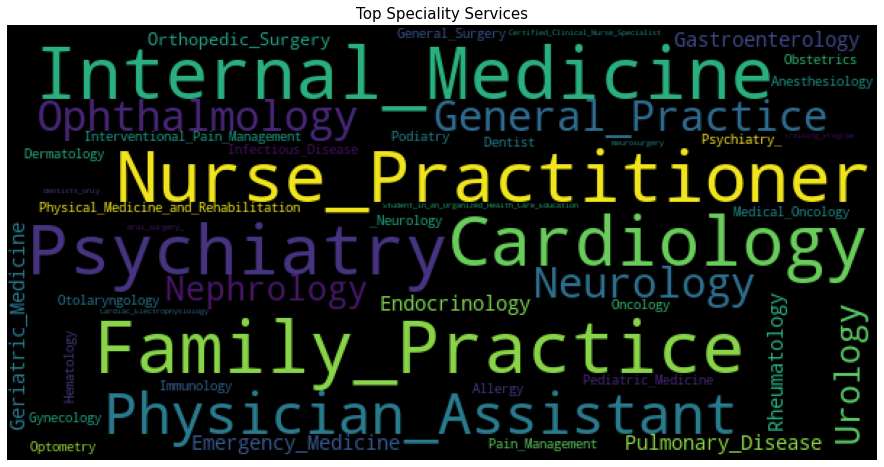

In [36]:
txt = " ".join(tempdf.specialty_description1)
wordcloud = WordCloud(background_color='black', max_font_size=50, width=600, height=300).generate(txt)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.title("Top Speciality Services", fontsize=15)
plt.axis("off")
plt.show() 

In [ ]:
#Now it's Your Turn to to apply for others dataset